In [79]:
%matplotlib inline
import matplotlib.pyplot as plt

import keras
from keras.models import Model, Sequential
from keras.layers import *
from keras.optimizers import Adam

import tensorflow as tf
import numpy as np

import pandas as pd
from collections import Counter
from sklearn.model_selection import train_test_split

print(keras.__version__)
print(tf.__version__)

2.0.5
1.3.0


In [80]:
# Build set of numbers of remove
remove_num = 5
remove_list = []
for iteration in range(remove_num):
    rand_num = np.random.randint(0, 100)
    if rand_num not in remove_list:
        remove_list.append(rand_num)
        
print(remove_list)

[62, 43, 81, 99, 20]


In [90]:
# Build dataset
n_classes = 201
dataset_size = 10000
pairs = pd.DataFrame(np.random.randint(0, 100, size=(dataset_size, 2)))

pairs = pairs[~pairs[0].isin(remove_list) & ~pairs[1].isin(remove_list)]

labels = pd.DataFrame([pair[0] + pair[1] for index, pair in pairs.iterrows()])
labels = pd.DataFrame(keras.utils.to_categorical(labels, n_classes))

print(pairs[:10])
print(labels[:10])

    0   1
0  47  17
1  13  33
2   5  67
3  89  85
4  49   7
5  39  59
6  68  27
7  92  97
8  91  70
9   7  19
   0    1    2    3    4    5    6    7    8    9   ...   191  192  193  194  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
6  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
7  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
8  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
9  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   

   195  1

In [82]:
# Convert integer to binary
def convert_int_to_bin_list(num, places=7):
    return list(format(num, '0'+str(places)+'b'))

convert_int_to_bin_list(50, 7)

# Format the pairs
pairs_vectors = [convert_int_to_bin_list(pair[0]) + convert_int_to_bin_list(pair[1]) for index, pair in pairs.iterrows()]

print(pairs_vectors[:10])

[['0', '0', '0', '1', '1', '0', '1', '0', '0', '1', '1', '0', '1', '0'], ['1', '0', '1', '1', '1', '0', '0', '0', '1', '0', '0', '1', '0', '1'], ['1', '0', '1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '1', '0'], ['0', '1', '0', '0', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0'], ['0', '1', '1', '1', '1', '0', '1', '1', '0', '1', '1', '1', '1', '1'], ['0', '0', '1', '1', '0', '1', '1', '0', '0', '1', '0', '0', '1', '1'], ['0', '0', '0', '1', '1', '1', '0', '1', '0', '1', '1', '0', '1', '1'], ['0', '0', '1', '1', '1', '0', '1', '0', '1', '0', '0', '1', '1', '0'], ['0', '0', '1', '1', '0', '0', '1', '1', '0', '0', '0', '1', '0', '0'], ['0', '1', '0', '1', '0', '0', '1', '0', '1', '1', '1', '0', '0', '1']]


In [83]:
# Partition data into training set and validation set
x_train, x_test, y_train, y_test = train_test_split(pairs_vectors, labels.values, test_size=0.2)

In [84]:
# Training Parameters
learning_rate = 0.005
training_epochs = 100
batch_size = 100

# Network Parameters
n_input = 14
n_hidden = 128 
num_layers = 3

In [85]:
# Set up the input layer, hidden layers and output layer
Inp = Input(shape=(n_input,))
x = Inp
for index in range(num_layers):
    x = Dense(n_hidden, activation='relu', name = "Dense_" + str(index))(x)

output = Dense(n_classes, activation='softmax', name = "Outputlayer")(x)

In [86]:
model = Model(Inp, output)

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 14)                0         
_________________________________________________________________
Dense_0 (Dense)              (None, 128)               1920      
_________________________________________________________________
Dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
Dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
Outputlayer (Dense)          (None, 201)               25929     
Total params: 60,873
Trainable params: 60,873
Non-trainable params: 0
_________________________________________________________________


In [87]:
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Set the learning rate of the model
K.set_value(model.optimizer.lr, learning_rate)

In [88]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=training_epochs,
                    verbose=1, # This is for what we want it to display out as it trains 
                    validation_data=(x_test, y_test))

Train on 7180 samples, validate on 1795 samples
Epoch 1/100
7180/7180 [==============================] - 1s - loss: 4.8242 - acc: 0.0180 - val_loss: 4.1774 - val_acc: 0.0279
Epoch 2/100
7180/7180 [==============================] - 0s - loss: 3.7189 - acc: 0.0635 - val_loss: 3.3399 - val_acc: 0.0852
Epoch 3/100
7180/7180 [==============================] - 0s - loss: 2.7636 - acc: 0.1728 - val_loss: 2.3653 - val_acc: 0.2245
Epoch 4/100
7180/7180 [==============================] - 0s - loss: 1.9496 - acc: 0.3454 - val_loss: 1.6429 - val_acc: 0.4401
Epoch 5/100
7180/7180 [==============================] - 0s - loss: 1.2491 - acc: 0.5727 - val_loss: 1.0079 - val_acc: 0.6607
Epoch 6/100
7180/7180 [==============================] - 0s - loss: 0.7396 - acc: 0.7443 - val_loss: 0.7350 - val_acc: 0.7476
Epoch 7/100
7180/7180 [==============================] - 0s - loss: 0.4815 - acc: 0.8394 - val_loss: 0.4541 - val_acc: 0.8524
Epoch 8/100
7180/7180 [==============================] - 0s - loss: 0.

7180/7180 [==============================] - 0s - loss: 0.0023 - acc: 0.9999 - val_loss: 0.0432 - val_acc: 0.9961
Epoch 66/100
7180/7180 [==============================] - 0s - loss: 0.0023 - acc: 0.9999 - val_loss: 0.0433 - val_acc: 0.9961
Epoch 67/100
7180/7180 [==============================] - 0s - loss: 0.0023 - acc: 0.9999 - val_loss: 0.0433 - val_acc: 0.9961
Epoch 68/100
7180/7180 [==============================] - 0s - loss: 0.0023 - acc: 0.9999 - val_loss: 0.0433 - val_acc: 0.9961
Epoch 69/100
7180/7180 [==============================] - 0s - loss: 0.0023 - acc: 0.9999 - val_loss: 0.0433 - val_acc: 0.9961
Epoch 70/100
7180/7180 [==============================] - 0s - loss: 0.0023 - acc: 0.9999 - val_loss: 0.0433 - val_acc: 0.9961
Epoch 71/100
7180/7180 [==============================] - 0s - loss: 0.0023 - acc: 0.9999 - val_loss: 0.0434 - val_acc: 0.9961
Epoch 72/100
7180/7180 [==============================] - 0s - loss: 0.0023 - acc: 0.9999 - val_loss: 0.0434 - val_acc: 0.99

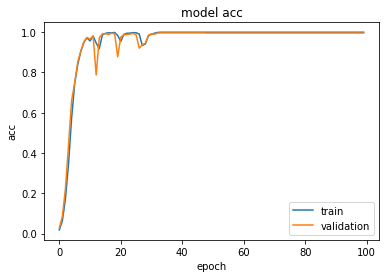

In [89]:
# Plot the model accuracy across epochs
def plot_train(hist):
    h = hist.history
    if 'acc' in h:
        meas='acc'
        loc='lower right'
    else:
        meas='loss'
        loc='upper right'
    plt.plot(hist.history[meas])
    plt.plot(hist.history['val_'+meas])
    plt.title('model '+meas)
    plt.ylabel(meas)
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc=loc)
    
plot_train(history)

In [101]:
predict_pairs = [(62, 4), (43, 3)]
predict_pairs = pd.DataFrame.from_records(predict_pairs)
print(predict_pairs)

#predict_pairs = pd.DataFrame(np.random.randint(0, 100, size=(5, 2)))

predict_pairs_vectors = [convert_int_to_bin_list(pair[0]) + convert_int_to_bin_list(pair[1]) for index, pair in predict_pairs.iterrows()]

prediction = model.predict(predict_pairs_vectors)

print([predict_pairs[0] + predict_pairs[1] for pair in predict_pairs])

print([np.argmax(array) for array in prediction])

    0  1
0  62  4
1  43  3
[0    66
1    46
dtype: int64, 0    66
1    46
dtype: int64]
[66, 46]
